## ΑΓΓΕΛΟΣ ΜΕΝΓΚΑ Ε22102


αρχικα κανουμε Import ολες τις απαραιτητες βιβλιοθηκες για την αναλυση ενος csv αρχειου και datetime, timedelta για να γινει πιο ευκολα η επεξεργασια ημερομηνιων

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

εισαγουμε το αρχειο data.csv με την μεθοδο της Pandas και επειτα αποθηκευουμε το αρχειο σε μια μεταβλητη ως dataframe

In [87]:
file='data.csv'
df=pd.read_csv(file)
df

,TripId,StartTime,EndTime,StartStationId,EndStationId
0,2616540,2023-02-01 00:28:04,2023-02-01 00:45:18,1,0
1,2616644,2023-02-01 00:34:08,2023-02-01 00:45:49,1,0
2,2616730,2023-02-01 00:39:18,2023-02-01 00:52:06,1,0
3,2617099,2023-02-01 00:59:02,2023-02-01 01:08:31,0,1
4,2617103,2023-02-01 00:59:35,2023-02-01 01:08:19,0,1
...,...,...,...,...,...
8631,3988772,2023-02-28 23:29:08,2023-02-28 23:33:32,1,0
8632,3988863,2023-02-28 23:33:01,2023-02-28 23:36:30,0,1
8633,3988901,2023-02-28 23:35:32,2023-02-28 23:40:22,1,0
8634,3988930,2023-02-28 23:36:58,2023-02-28 23:45:17,0,1


Αν χρησιμοποιησουμε τη συναρτηση type της Python παρατηρουμε οτι οι ημερομηνιες ειναι τυπου String

In [88]:
type(df['StartTime'][0])

str

για την αναλυση χρονοσειρων ειναι απαραιτητη η μετατροπη των ημερομηνιων απο String μεταβλητες σε DateTime μεταβλητες, με τη χρηση της συναρτησης της pandas η μετατροπη αυτη γινεται πολυ ευκολα.Κανονικα ομως θα επρεπε να οριστει και ο τροπος με τον οποιο αναπαριστωνται οι ημερομηνιες, ομως στο csv αρχειο χρησιμοποιειται ο default τροπος αναπαραστασης ημερομηνιων της Python. Χρησιμη για το date time formatting στη python ειναι η παρακατω ιστοσελιδα

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

πριν το date time formatting βεβαια καλο ειναι να γινει ελεγχος για missing, null values

In [89]:
df.isnull().sum()

TripId            0
StartTime         0
EndTime           0
StartStationId    0
EndStationId      0
dtype: int64

Παρατηρουμε οτι το dataframe μας δεν εχει καποιο missing value σε κανενα απο τα columns, επομενως μπορουμε να συνεχισουμε με το date time formatting

In [90]:
df['StartTime']=pd.to_datetime(df['StartTime'] )
df['EndTime']=pd.to_datetime(df['EndTime'])

Πριν φτιαχτει η χρονοσειρα ειναι σημαντικη η αναφορα της resample() μεθοδου της Pandas και πως λειτουργει.

η resample κανει δειγματοληψια στο dataframe μας με βαση το χρονικο διαστημα που εχουμε βαλει για τις περιοδους.Ομως αν δεν ολοκληρωθει μια περιοδος τοτε η resample δεν παιρνει υποψη τις τιμες που βρισκονται σε εκεινη τη περιοδο.Ειδικοτερα αν παρατηρησουμε στο dataframe μας η τελευταια τιμη της StartTime ειναι στις 28 φεβρουαριου την ωρα 23:59. 1 λεπτο πριν τη ληξης της ημερας! Αν το αφησουμε ετσι τοτε θα παρουσιαστει προβλημα με τη δειγματοληψια και θα εχουμε ελλειψη τιμων(κυριως αν βαλουμε αρτιες τιμες για ωρες), επομενως μια λυση ειναι να βαλουμε ενα extra row στο dataframe οπου τα StartTime και EndTime θα εχουν τιμες μια ωρα μετα τις ωρες που μας εχουν δωθει με τιμες 0 στα StartStationId,EndStationId για να μην παρουσιαστει προβλημα με τις προβλεψεις

παρακατω οριζουμε μια TimeDelta μεταβλητη για να χρησιμοποιηθει ως παραμετρος στη resample

In [91]:
T =timedelta(hours=2)

φτιαχουμε τη γραμμη που θα εισαγουμε στο dataframe για να εχουμε σωστη δειγματοληψια που περιεχει τη τελευταια περιοδο.Το row αυτο ειναι τυπου dictionary για να γινει πιο ευκολα η εισαγωγη του στο dataframe

In [92]:
samplerow={'TripId':'0','StartTime':pd.to_datetime('2023-03-01 01:00:00'),'EndTime':pd.to_datetime('2023-03-01 01:05:00'),'StartStationId':0,'EndStationId':0}
temp=len(df)
df.loc[temp]=samplerow ##len(df) efoson ta dataframe ksekinane apo to 0 kai oxi to 1 epomenws to len(df) tha einai to katallhlo shmeio gia thn eisagwgh ths grammhs
df

,TripId,StartTime,EndTime,StartStationId,EndStationId
0,2616540,2023-02-01 00:28:04,2023-02-01 00:45:18,1,0
1,2616644,2023-02-01 00:34:08,2023-02-01 00:45:49,1,0
2,2616730,2023-02-01 00:39:18,2023-02-01 00:52:06,1,0
3,2617099,2023-02-01 00:59:02,2023-02-01 01:08:31,0,1
4,2617103,2023-02-01 00:59:35,2023-02-01 01:08:19,0,1
...,...,...,...,...,...
8632,3988863,2023-02-28 23:33:01,2023-02-28 23:36:30,0,1
8633,3988901,2023-02-28 23:35:32,2023-02-28 23:40:22,1,0
8634,3988930,2023-02-28 23:36:58,2023-02-28 23:45:17,0,1
8635,3989403,2023-02-28 23:59:04,2023-03-01 00:20:25,1,0


Παρακατω γινεται η δειγματοληψια, για να γινει σωστα η δειγματοληψια με τη χρηση της resample πρεπει να εχουμε ως Indexes αντικειμενα τυπου datetime, συνεπως θα ορισουμε ως Index το StartTime καθως αυτο περιεχει τα χρονικα διαστηματα που ειναι σημαντικα για τη δειγματοληψια

In [93]:
df.set_index(['StartTime'],inplace=True)

Χρηση της συναρτησης agg(aggregate) για να εχουμε μονο τη ζητηση ποδηλατων σε ενα χρονικο διαστημα μαζι με την ελλειψη ποδηλατων στους σταθμους χωρις να υπαρχουν οι υπολοιπες μεταβλητες οπως η tripId

In [94]:
s=df.resample(T).agg({'StartStationId':'sum','EndStationId':'sum'})

φτιαχουμε μετα ενα νεο column οπου θα εχει την αφαιρεση EndStationId - StartStationId για να δημιουργηθει η χρονοσειρα ζητησης ποδηλατων και για να εχουμε το συνολο ποδηλατων που υπαρχουν στον σταθμο εκεινη τη χρονικη περιοδο

In [95]:
s['demandbysample']=s['EndStationId']-s['StartStationId']
s

,StartStationId,EndStationId,demandbysample
StartTime,,,
2023-02-01 00:00:00,4,3,-1
2023-02-01 02:00:00,1,1,0
2023-02-01 04:00:00,0,1,1
2023-02-01 06:00:00,18,15,-3
2023-02-01 08:00:00,37,24,-13
...,...,...,...
2023-02-28 16:00:00,25,32,7
2023-02-28 18:00:00,28,34,6
2023-02-28 20:00:00,14,18,4


Τελικα μπορουμε να κανουμε Plot τη πρωτη χρονοσειρα ζητησης

Text(0, 0.5, 'demand')

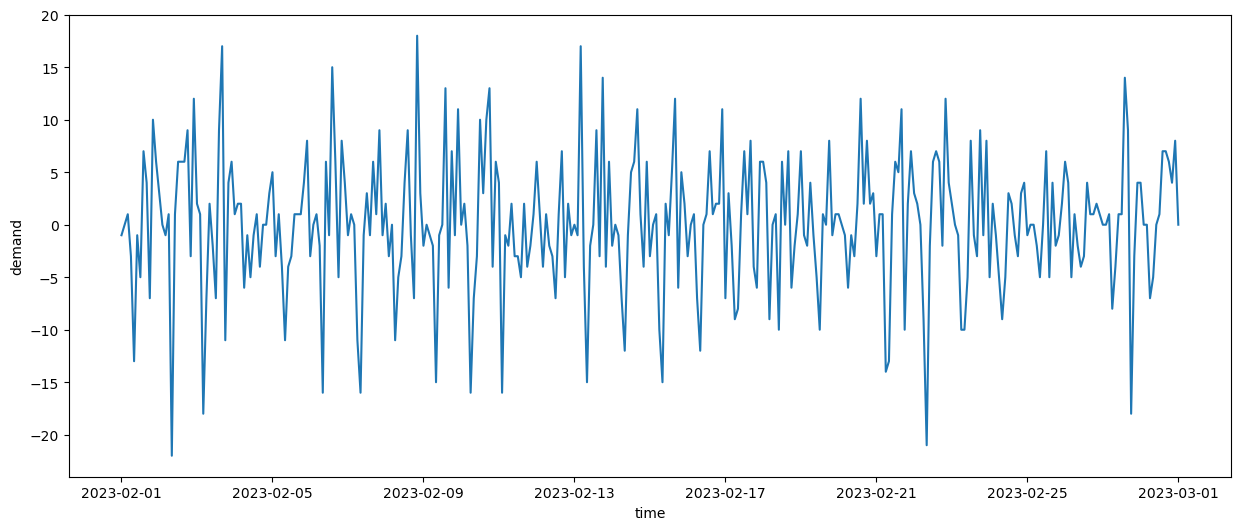

In [96]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
ax.plot(s.demandbysample)
plt.xlabel("time")
plt.ylabel("demand")

Απο το διαγραμμα μπορουμε να παρατηρησουμε 2 σημαντικα πραγματα:


1: Η χρονοσειρα δεν εχει ταση, εφοσον περιστρεφεται σταθερα προς το 0


2: Η χρονοσειρα εχει εποχικοτητα καθως σε μερικα χρονικα διαστηματα μειωνεται πολυ γρηγορα η ζητηση



Ομως, το διαγραμμα χρονοσειρας δεν αρκει για να αποδειχτουν αυτες οι 2 δηλωσεις, συνεπως πρεπει να κανουμε αποσυνθεση με τη χρηση της βιβλιοθηκης seasonal decompose

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(s['demandbysample'],period=7)

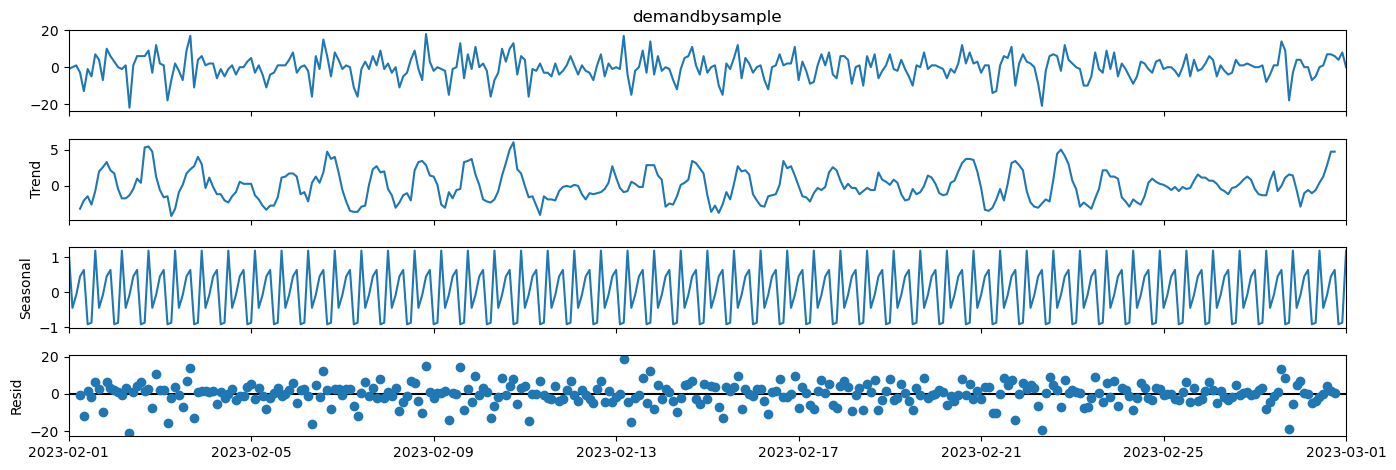

In [98]:
sd.plot().set_figwidth(16)

Με βαση το plot αυτο αποδειχτηκε οτι η χρονοσειρα δεν εχει ταση, εφοσον οι τιμες του διαγραμματος trend περιστρεφονται στο 0

παραλληλα η χρονοσειρα εχει ταση, εφοσον παρατηρουμε μια περιοδικοτητα στο διαγραμμα Seasonal

Αλλο ενα κομματι το οποιο πρεπει να αναλυθει ειναι η στασιμοτητα της χρονοσειρας, με τη χρηση ενος auto correlation διαγραμματος μπορουμε πανευκολα να δουμε αν ειναι στασιμη

In [99]:
from statsmodels.graphics.tsaplots import plot_acf

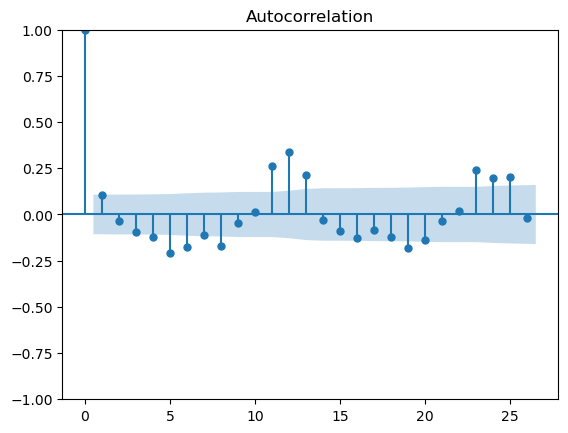

In [100]:
plot_acf(s['demandbysample'])
plt.show()

Παρατηρουμε οτι το ACF πεφτει στη τιμη 0 πολυ γρηγορα, επομενως αυτο σημαινει οτι η χρονοσειρα ζητησης ειναι στασιμη

## Προβλεψεις, δεδομενα εκπαιδευσης και ελεγχου

συνεχιζοντας, για την αξιολογηση των προβλεπτικων μοντελων πρεπει να χωριστουν τα δεδομενα του dataframe ζητησης σε 2 διαφορετικα dataframe οπου το ενα θα περιεχει τα δεδομενα εκπαιδευσης, δηλαδη τα δεδομενα που θα δωσουμε στα προβλεπτικα μοντελα και τα δεδομενα ελεγχου για να δουμε ποση αποκλιση εχουν απο τη πραγματικη χρονοσειρα ζητησης

In [101]:
split = int(len(s) * 0.7)
train = s[:split]
test = s[split:]

Επειτα κανουμε plot τα δεδομενα εκπαιδευσης και ελεγχου στο ιδιο διαγραμμα

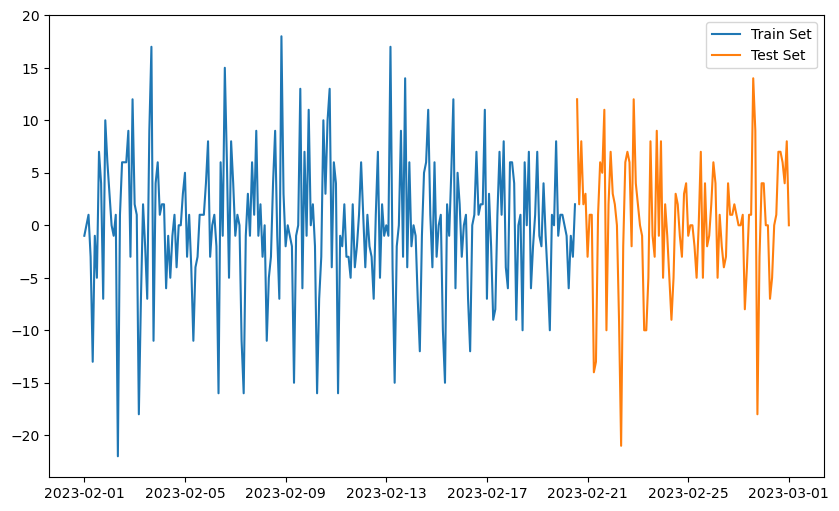

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(train['demandbysample'], label='Train Set')
plt.plot(test['demandbysample'], label='Test Set')
plt.legend()
plt.show()

Για να ορισουμε τις ημερομηνιες για την αρχη και το τελος των προβλεψεων παιρνουμε τα indexes του πρωτου δειγματος και του τελευταιου οπου ειναι timestamps Οπως ορισαμε προηγουμενως

In [103]:
startof=test.index[0]
endof=test.index[-1]

Τα προβλεπτικα μοντελα τα οποια θα χρησιμοποιησουμε ειναι τα εξης:

1: Εκθετικη εξομαλυνση (Exponential Smoothing)

2: Αυτοματη παλινδρομηση (Auto Regression)

3: SARIMAX , οπου ειναι το μοντελο ARIMA αλλα παιρνει υποψην και την εποχικοτητα μιας χρονοσειρας, τα δεδομενα μας εχουν εποχικοτητα οποτε αναμενεται να εχει καλυτερες προβλεψεις απο οτι το μοντελο ARIMA

In [104]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
from statsmodels.tsa.ar_model import AutoReg as AR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LogisticRegression

Αρχικα οριζουμε το μοντελο της εκθετικης εξομαλυνσης και δημιουργουμε μια μεταβλητη τυπου Series οπου περιεχει ολες τις επομενες προβλεψεις για καθε περιοδο

Βαζουμε seasonal period=12 γιατι παρατηρησαμε μια εποχικοτητα καθε 12 ωρες

In [105]:
expsmooth=ES(train['demandbysample'],trend=None,seasonal='add',seasonal_periods=12).fit(smoothing_level=.2)
espred = expsmooth.predict(start=startof, end=endof)


Δημιουργια διαγραμματος οπου εχουμε κανει πλοτ και τα δεδομενα ελεγχου και τα δεδομενα της εκθετικης εξομαλυνσης

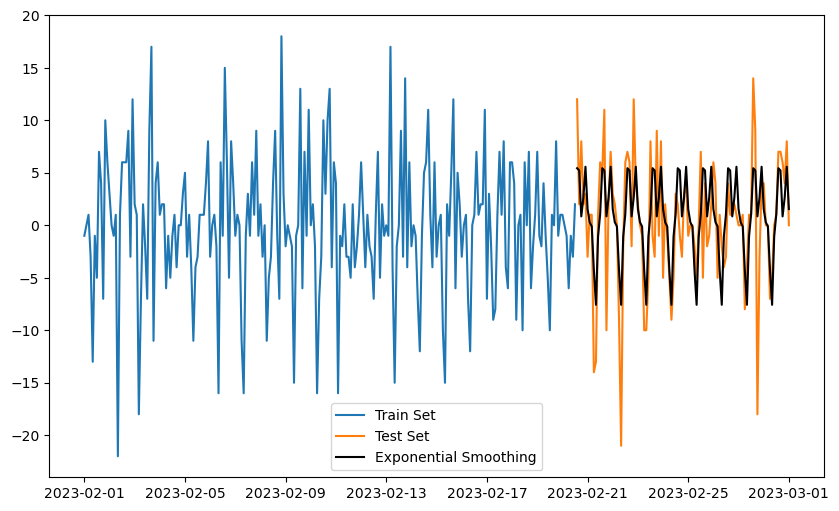

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(train['demandbysample'], label='Train Set')
plt.plot(test['demandbysample'], label='Test Set')
plt.plot(espred,label='Exponential Smoothing',color='black')
plt.legend()
plt.show()


επειτα δημιουργουμε το μοντελο του Auto Regression με Lags=15, δηλαδη θα παιρνει τις προηγουμενες 15 τιμες της χρονοσειρας

In [107]:
ar = AR(train['demandbysample'], lags=15).fit()
arpred = ar.predict(start=startof, end=endof)

μετα φτιαχνουμε τα διαγραμματα οπως καναμε με την εκθετικη εξομαλυνση

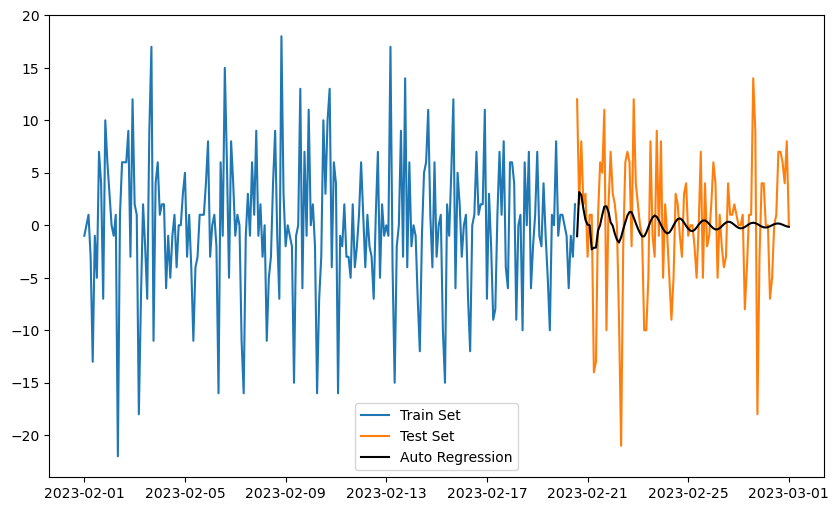

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(train['demandbysample'], label='Train Set')
plt.plot(test['demandbysample'], label='Test Set')
plt.plot(arpred,label='Auto Regression',color='black')
plt.legend()
plt.show()

Τελος, δημιουργουμε το προβλεπτικο μοντελο SARIMAX,οπου σε διαφορα με το απλο ARIMA οπου δεχεται μονο παραμετρους p,d,q το SARIMAX δεχεται και P,D,Q,m οπου:

* p = τάξη του αυτοπαλίνδρομου μέρους 
* d = τάξη πρώτων διαφορών
* q = τάξη του μέρους του κινητού μέσου


Ενω τα P,D,Q ειναι οι ταξεις του εποχιακου συστατικου της χρονοσειρας και η παραμετρος m ειναι ο αριθμος περιοδων ανα εποχη, εφοσον εχουμε δεδομενα 1 μηνα το οριζουμε 24 για να δειξουμε οτι αναφερομαστε σε ημερησια περιοδο

(Οι παραμετροι της Sarimax βρεθηκαν με τη χρηση του auto arima που βρισκεται στην βιβλιοθηκη pmdarima οπου πρεπει να κατεβαστει απο τον χρηστη παρακατω εχω βαλω τον κωδικα σε μορφη σχολιων για το Installation και την εκτελεση του)

In [ ]:
#!pip install pmdarima

In [ ]:
#import pmdarima as pm
#arimamodel=pm.auto_arima(train['demandbysample'])

In [110]:
sarimax=SARIMAX(train['demandbysample'],order=(2,1,0),seasonal_order=(2,1,0,24)).fit()
sarimaxpred=sarimax.predict(start=startof,end=endof)

κανουμε το καταλληλο plotting

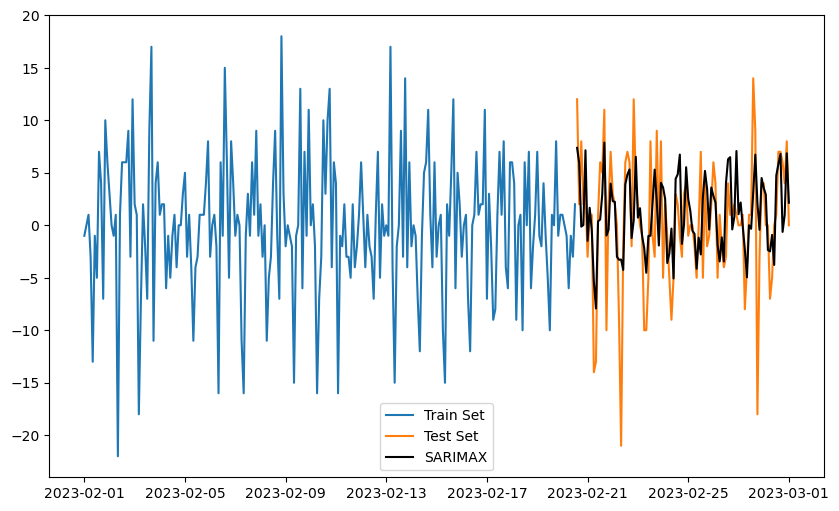

In [111]:
plt.figure(figsize=(10,6))
plt.plot(train['demandbysample'],label='Train Set')
plt.plot(test['demandbysample'],label='Test Set')
plt.plot(sarimaxpred,label='SARIMAX',color='black')
plt.legend()
plt.show()

επειτα θα κανουμε πλοτ ολα τα προβλεπτικα μοντελα και τα αρχικα δεδομενα μας στο ιδιο διαγραμμα

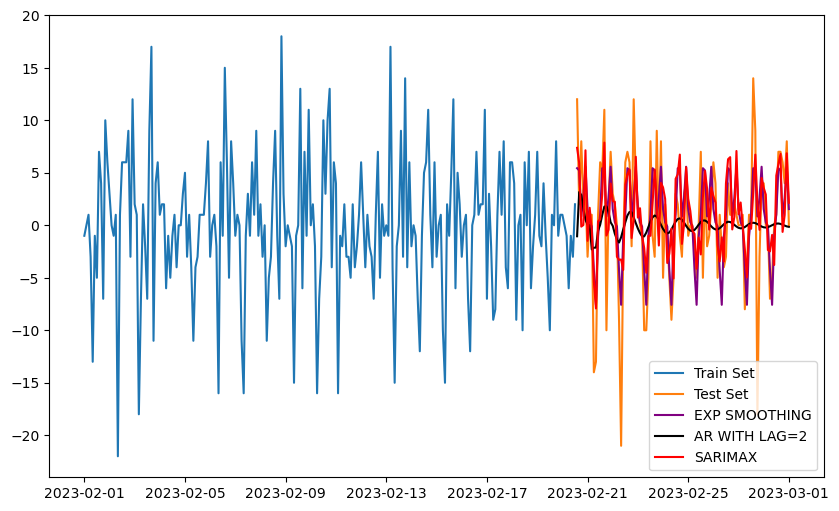

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(train['demandbysample'], label='Train Set')
plt.plot(test['demandbysample'], label='Test Set')
plt.plot(espred,label='EXP SMOOTHING',color='purple')
plt.plot(arpred,label='AR WITH LAG=2',color='black')
plt.plot(sarimaxpred,label='SARIMAX',color='red')
plt.legend()
plt.show()

Προφανως δε μπορουμε να βγαλουμε συμπερασμα αξιολογησης μονο με το διαγραμμα, συνεπως πρεπει να χρησιμοποιηθει μια αλλη μεθοδος αξιολογησης

παρακατω αξιολογουνται ολα τα μοντελα με τα mean absolute error και root mean square error

In [113]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm

In [114]:
print('MAE')
ARmae=round(mae(test['demandbysample'], arpred),3)
ESmae=round(mae(test['demandbysample'], espred),3)
SARIMAXmae=round(mae(test['demandbysample'],sarimaxpred),3)
print('AR:',ARmae)
print('EXP SMOOTHING:',ESmae)
print('SARIMAX:',SARIMAXmae)

MAE
AR: 4.29
EXP SMOOTHING: 3.389
SARIMAX: 3.589


In [115]:
ARmse=round(np.sqrt(mse(test['demandbysample'],arpred)),3)
ESmse=round(np.sqrt(mse(test['demandbysample'],espred)),3)
SARIMAXmse=round(np.sqrt(mse(test['demandbysample'],sarimaxpred)),3)
print('RMSE')
print('AR:',ARmse)
print('EXPONENTIAL SMOOTHING:',ESmse)
print('SARIMAX:',SARIMAXmse)

RMSE
AR: 5.758
EXPONENTIAL SMOOTHING: 4.608
SARIMAX: 5.001


για Τ=2 ωρες η εκθετικη εξομαλυνση εχει το μικροτερο error, μετα το SARIMAX εχει το 2ο και τελος το Auto regression

## Η χρονοσειρα και οι προβλεψεις για διαφορετικες τιμες του Τ

Για Τ=4

εχουμε την αρχικη χρονοσειρα

In [116]:
s4=df.resample(timedelta(hours=4)).agg({'StartStationId':'sum','EndStationId':'sum'})
s4

,StartStationId,EndStationId
StartTime,,
2023-02-01 00:00:00,5,4
2023-02-01 04:00:00,18,16
2023-02-01 08:00:00,51,37
2023-02-01 12:00:00,26,28
2023-02-01 16:00:00,70,67
...,...,...
2023-02-28 08:00:00,32,27
2023-02-28 12:00:00,29,37
2023-02-28 16:00:00,53,66


Text(0, 0.5, 'demand')

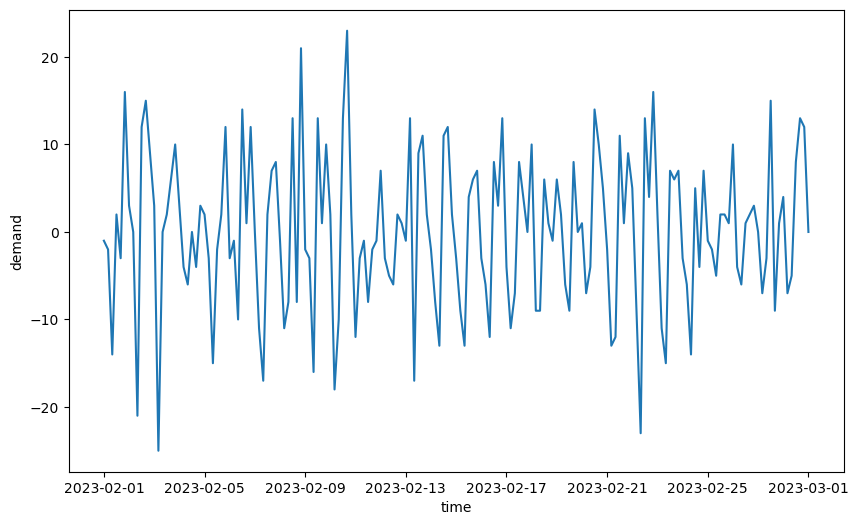

In [117]:
s4['demandbysample']=s4['EndStationId']-s4['StartStationId']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(s4['demandbysample'])
plt.xlabel("time")
plt.ylabel("demand")

Επαναλαμβανουμε τη διαδικασια οπως πριν (χωρισμος σε train, test sets αρχικοποιηση των μοντελων και Plotting) και βγαινουν τα παρακατω αποτελεσματα

train,test sets

In [118]:
split = int(len(s4) * 0.7)
train4=s4[:split]
test4=s4[split:]

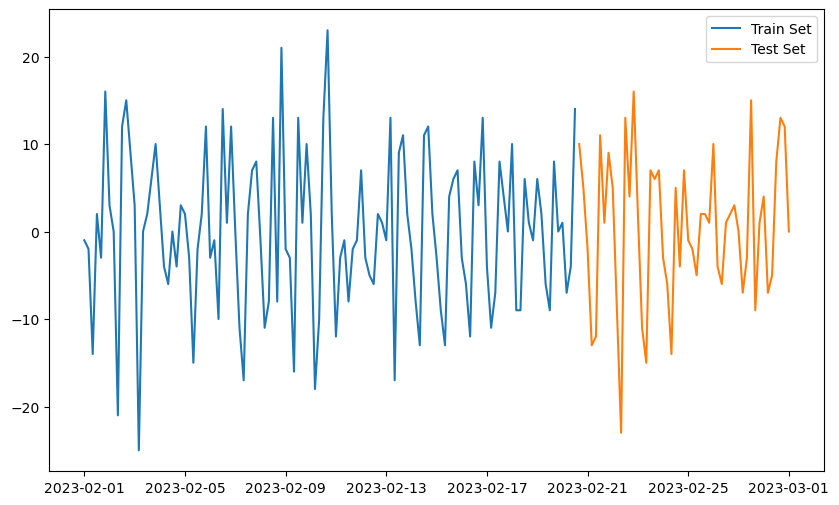

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(train4['demandbysample'], label='Train Set')
plt.plot(test4['demandbysample'], label='Test Set')
plt.legend()
plt.show()

In [120]:
startof4=test4.index[0]
endof4=test4.index[-1]

Auto regression

In [121]:
ar4 = AR(train4['demandbysample'], lags=15).fit()
arpred4 = ar4.predict(start=startof4, end=endof4)

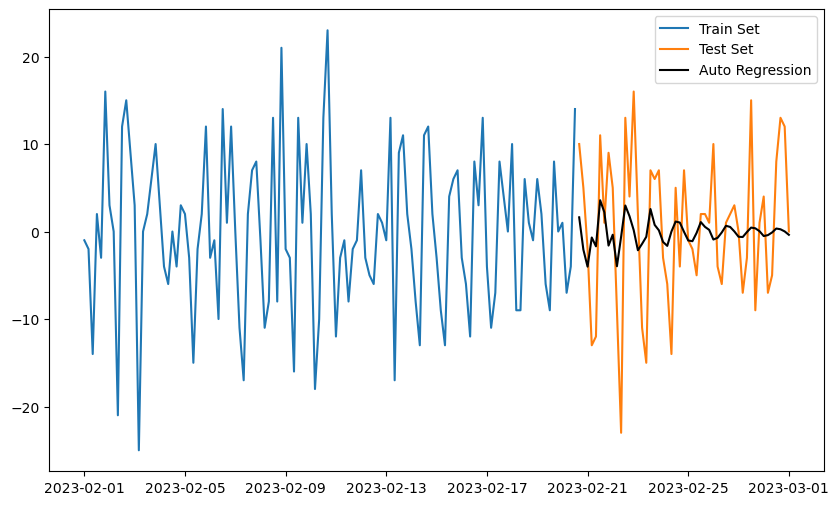

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(train4['demandbysample'], label='Train Set')
plt.plot(test4['demandbysample'], label='Test Set')
plt.plot(arpred4,label='Auto Regression',color='black')
plt.legend()
plt.show()

Exponential smoothing

In [123]:
expsmooth4=ES(train4['demandbysample'],trend=None,seasonal='add',seasonal_periods=12).fit(smoothing_level=.2)
espred4 = expsmooth4.predict(start=startof4, end=endof4)


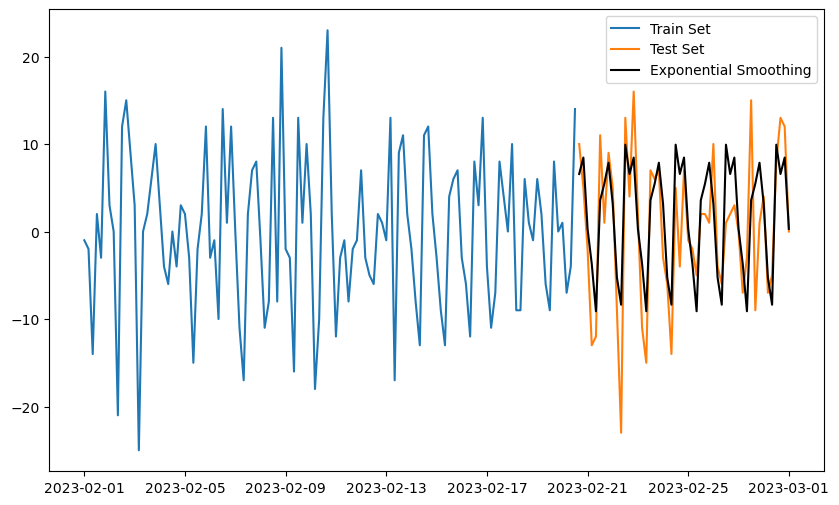

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(train4['demandbysample'], label='Train Set')
plt.plot(test4['demandbysample'], label='Test Set')
plt.plot(espred4,label='Exponential Smoothing',color='black')
plt.legend()
plt.show()


SARIMAX

In [125]:
sarimax4=SARIMAX(train4['demandbysample'],order=(2,1,0),seasonal_order=(2,1,0,24)).fit()
sarimaxpred4=sarimax4.predict(start=startof4,end=endof4)

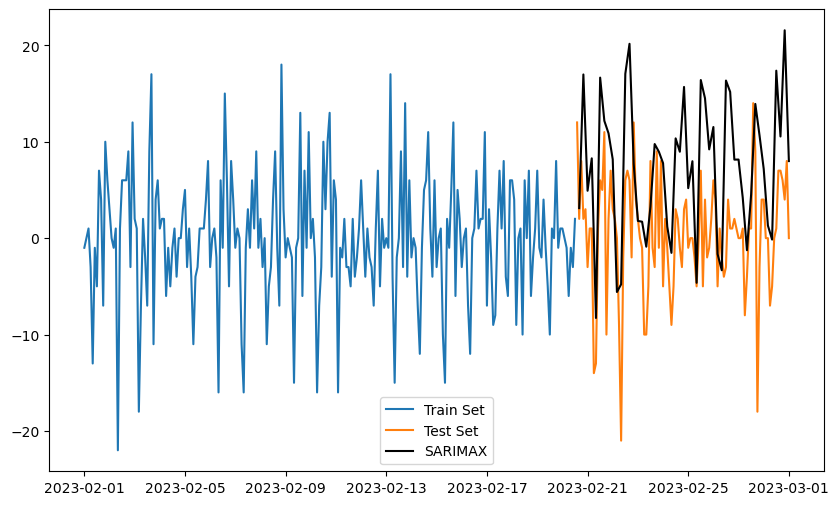

In [126]:
plt.figure(figsize=(10,6))
plt.plot(train['demandbysample'],label='Train Set')
plt.plot(test['demandbysample'],label='Test Set')
plt.plot(sarimaxpred4,label='SARIMAX',color='black')
plt.legend()
plt.show()

Και τελος τα αποτελεσματα των Mean absolute error kai root mean squared error

In [127]:
print('MAE')
ARmae4=round(mae(test4['demandbysample'], arpred4),3)
ESmae4=round(mae(test4['demandbysample'], espred4),3)
SARIMAXmae4=round(mae(test4['demandbysample'],sarimaxpred4),3)
print('AR:',ARmae4)
print('EXP SMOOTHING:',ESmae4)
print('SARIMAX:',SARIMAXmae4)

MAE
AR: 6.243
EXP SMOOTHING: 4.433
SARIMAX: 8.203


In [128]:
ARmse4=round(np.sqrt(mse(test4['demandbysample'],arpred4)),3)
ESmse4=round(np.sqrt(mse(test4['demandbysample'],espred4)),3)
SARIMAXmse4=round(np.sqrt(mse(test4['demandbysample'],sarimaxpred4)),3)
print('RMSE')
print('AR:',ARmse4)
print('EXPONENTIAL SMOOTHING:',ESmse4)
print('SARIMAX:',SARIMAXmse4)

RMSE
AR: 7.908
EXPONENTIAL SMOOTHING: 5.587
SARIMAX: 9.748


παρατηρουμε οτι ξανα η εκθετικη εξομαλυνση εχει τη μεγαλυτερη ακριβεια, με τη μονη διαφορα στα αποτελεσματα να ειναι οτι το SARIMAX  εχει πολυ μεγαλυτερο error σε σχεση με τα αλλα 2

Για Τ=8

In [129]:
s8=df.resample(timedelta(hours=8)).agg({'StartStationId':'sum','EndStationId':'sum'})
s8

,StartStationId,EndStationId
StartTime,,
2023-02-01 00:00:00,23,20
2023-02-01 08:00:00,77,65
2023-02-01 16:00:00,100,113
2023-02-02 00:00:00,16,19
2023-02-02 08:00:00,77,68
...,...,...
2023-02-27 16:00:00,75,67
2023-02-28 00:00:00,15,12
2023-02-28 08:00:00,61,64


In [130]:
s8['demandbysample']=s8['EndStationId']-s8['StartStationId']

Text(0, 0.5, 'demand')

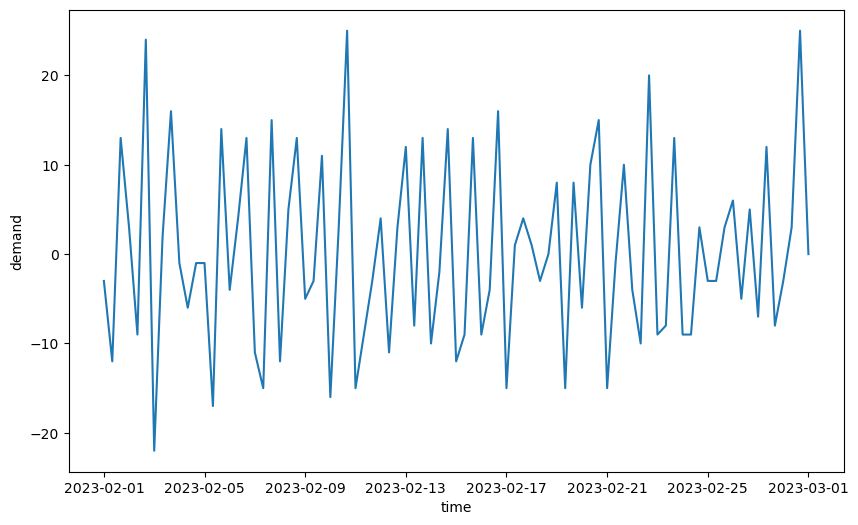

In [131]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(s8['demandbysample'])
plt.xlabel("time")
plt.ylabel("demand")

In [132]:
split8 = int(len(s8) * 0.7)
train8 = s8[:split8]
test8 = s8[split8:]

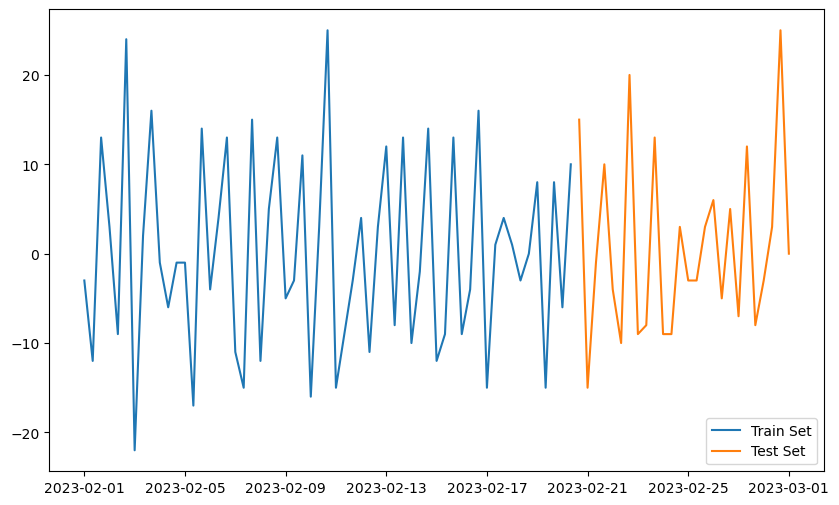

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(train8['demandbysample'], label='Train Set')
plt.plot(test8['demandbysample'], label='Test Set')
plt.legend()
plt.show()

In [134]:
startof8=test8.index[0]
endof8=test8.index[-1]

Exponential Smoothing

In [135]:
expsmooth8=ES(train8['demandbysample'],trend=None,seasonal='add',seasonal_periods=12).fit(smoothing_level=.2)
espred8 = expsmooth8.predict(start=startof8, end=endof8)

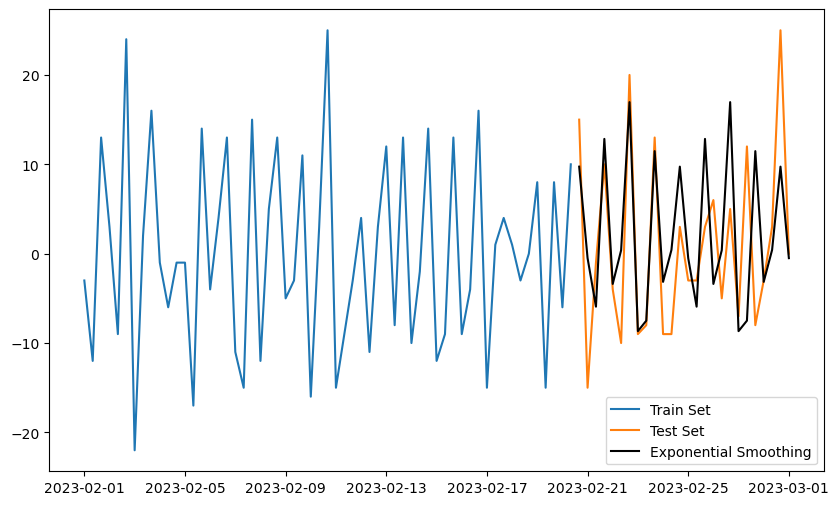

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(train8['demandbysample'], label='Train Set')
plt.plot(test8['demandbysample'], label='Test Set')
plt.plot(espred8,label='Exponential Smoothing',color='black')
plt.legend()
plt.show()

Auto Regression

In [137]:
ar8 = AR(train8['demandbysample'], lags=15).fit()
arpred8 = ar8.predict(start=startof8, end=endof8)

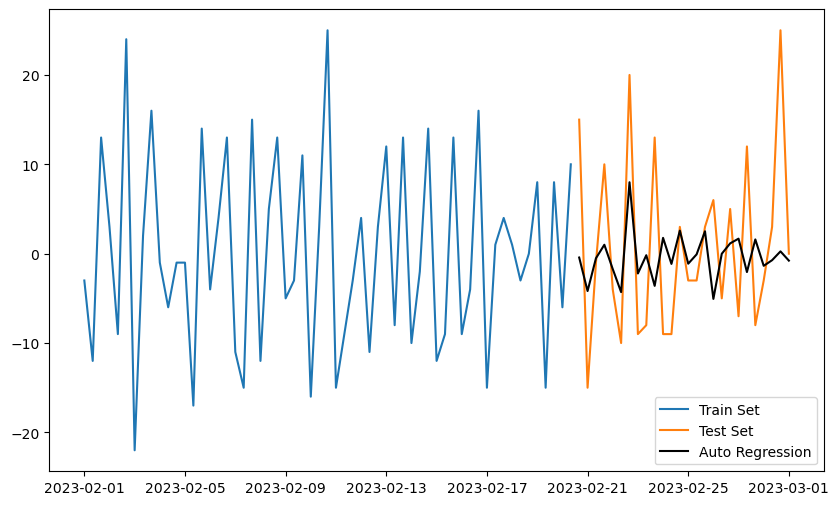

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(train8['demandbysample'], label='Train Set')
plt.plot(test8['demandbysample'], label='Test Set')
plt.plot(arpred8,label='Auto Regression',color='black')
plt.legend()
plt.show()

SARIMAX

In [139]:
sarimax8=SARIMAX(train8['demandbysample'],order=(2,1,0),seasonal_order=(2,1,0,24)).fit()
sarimaxpred8=sarimax8.predict(start=startof8,end=endof8)

c:\Users\aggelos\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\aggelos\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


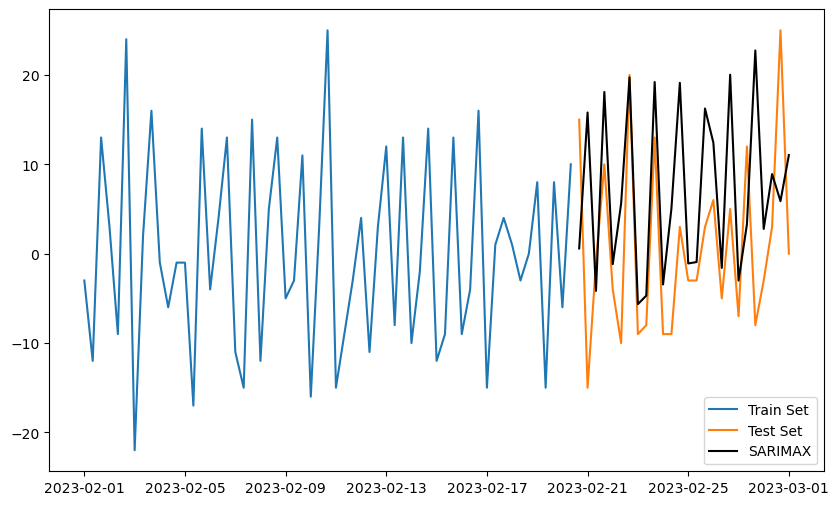

In [140]:
plt.figure(figsize=(10,6))
plt.plot(train8['demandbysample'],label='Train Set')
plt.plot(test8['demandbysample'],label='Test Set')
plt.plot(sarimaxpred8,label='SARIMAX',color='black')
plt.legend()
plt.show()

Mean absolute error, Root Mean Square Error

In [141]:
print('MAE')
ARmae8=round(mae(test8['demandbysample'], arpred8),3)
ESmae8=round(mae(test8['demandbysample'], espred8),3)
SARIMAXmae8=round(mae(test8['demandbysample'],sarimaxpred8),3)
print('AR:',ARmae8)
print('EXP SMOOTHING:',ESmae8)
print('SARIMAX:',SARIMAXmae8)

MAE
AR: 7.477
EXP SMOOTHING: 6.426
SARIMAX: 9.658


In [142]:
ARmse8=round(np.sqrt(mse(test8['demandbysample'],arpred8)),3)
ESmse8=round(np.sqrt(mse(test8['demandbysample'],espred8)),3)
SARIMAXmse8=round(np.sqrt(mse(test8['demandbysample'],sarimaxpred8)),3)
print('RMSE')
print('AR:',ARmse8)
print('EXPONENTIAL SMOOTHING:',ESmse8)
print('SARIMAX:',SARIMAXmse8)

RMSE
AR: 9.502
EXPONENTIAL SMOOTHING: 8.622
SARIMAX: 12.538


Παρατηρουμε ξανα πως οσο βαζουμε μεγαλυτερα διαστηματα περιοδων το μοντελο SARIMAX εχει πολυ μεγαλυτερη αποκλιση σε σχεση με τα αλλα μοντελα

## Σχολια και παρατηρησεις

1: Οσο αυξανουμε τη μεταβλητη Τ, παρατηρουμε οτι τα errors αυξανονται. Αυτο ειναι απολυτα λογικο, καθως ειναι πιο ευκολο να γινει προβλεψη για τις επομενες 2 ωρες αντι για τις επομενες 8, καθως μπορει υπαρχουν και πολλοι εξωτερικοι παραγοντες που δεν μπορουν να καταγραφουν σε μορφη δεδομενων π.χ. καιρος

2: To SARIMAX συγκεκριμενα χειροτερευει πιο γρηγορα απο οτι τα αλλα μοντελα και μετα τις 2 ωρες το Error του SARIMAX ειναι πολυ πιο μεγαλο. Αυτο μπορει να συμβαινει λογω των παραμετρων p,d,q Που εχουν ορισει και παρολο που οι τιμες βρεθηκαν απο αναλυση του Auto Arima, δεν αποκλειεται η λαθος εισαγωγη τιμων. 